In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


DATA_PATH = "teen_phone_addiction_dataset.csv"

df = pd.read_csv(DATA_PATH)

N = 3
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours',
        'Screen_Time_Before_Bed', 'Time_on_Social_Media',
        'Time_on_Gaming', 'Time_on_Education']
col = cols[N % len(cols)]
print(col)




Screen_Time_Before_Bed


## Задание I.

In [38]:
data = df[col].dropna()

mean_val = data.mean()
var_val = data.var(ddof=1)
mode_val = data.mode().iloc[0]
median_val = data.median()
quantiles = data.quantile([0.25, 0.5, 0.75])
kurtosis_val = stats.kurtosis(data, fisher=True)
skew_val = stats.skew(data)
iqr_val = stats.iqr(data)

print(f"Среднее: {mean_val:.3f}")
print(f"Дисперсия: {var_val:.3f}")
print(f"Мода: {mode_val}")
print(f"Медиана: {median_val}")
print("Квантили:")
print(quantiles)
print(f"Эксцесс: {kurtosis_val:.3f}")
print(f"Асимметрия: {skew_val:.3f}")
print(f"IQR: {iqr_val:.3f}")

Среднее: 1.007
Дисперсия: 0.243
Мода: 1.0
Медиана: 1.0
Квантили:
0.25    0.7
0.50    1.0
0.75    1.4
Name: Screen_Time_Before_Bed, dtype: float64
Эксцесс: -0.350
Асимметрия: 0.098
IQR: 0.700


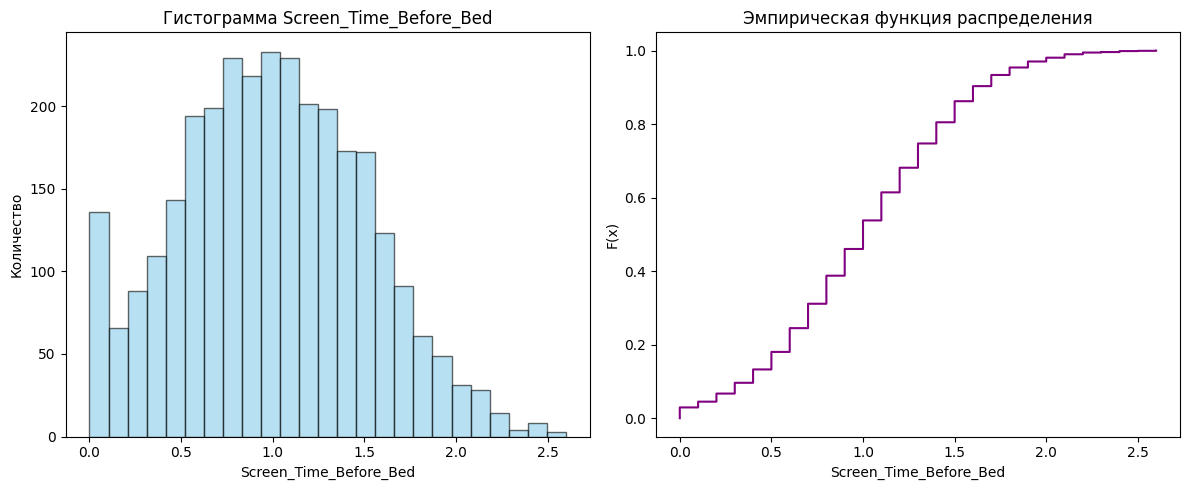

In [25]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(data, bins=25, density=False, alpha=0.6, color="skyblue", edgecolor="black")

plt.title("Гистограмма " + col)
plt.xlabel(col)
plt.ylabel("Количество")

plt.subplot(1,2,2)
sorted_data = np.sort(data)
yvals = np.arange(1, len(sorted_data)+1) / len(sorted_data)
plt.step(sorted_data, yvals, where="post", color="purple")
plt.title("Эмпирическая функция распределения")
plt.xlabel(col)
plt.ylabel("F(x)")

plt.tight_layout()
plt.show()


## Задание II. 

In [26]:
from scipy.stats import norm, chi2

def chi_square_test(data, alpha: float = 0.05) -> None:
    n = len(data)
    k = 1 + int(np.log2(n))  

    intervals = np.linspace(min(data), max(data), k + 1)
    real_freq, bin_edges = np.histogram(data, bins=intervals)

    mean_val = np.mean(data)
    std_val = np.std(data, ddof=1)
    expected_freq = np.array([
        norm.cdf(bin_edges[i + 1], mean_val, std_val) -
        norm.cdf(bin_edges[i], mean_val, std_val)
        for i in range(k)
    ]) * n


    chi_stat = np.sum((real_freq - expected_freq) ** 2 / expected_freq)
    deg = k - 1 - 2  
    critical_val = chi2.ppf(1 - alpha, deg)

    print(f"\nКритерий хи-квадрат для {col}:")
    print(f"Хи² статистика = {chi_stat:.4f}, критическое значение = {critical_val:.4f}, α = {alpha}")
    if chi_stat < critical_val:
        print("Гипотеза H0 не отвергается")
    else:
        print("Гипотеза H0 отвергается")

chi_square_test(data)


Критерий хи-квадрат для Screen_Time_Before_Bed:
Хи² статистика = 200.8067, критическое значение = 16.9190, α = 0.05
Гипотеза H0 отвергается


In [27]:
def skewness_kurtosis_test_v2(data, alpha=0.05):

    n = len(data)

    skew = stats.skew(data, bias=False)
    kurt = stats.kurtosis(data, fisher=True, bias=False)

    se_skew = np.sqrt(6 / n)
    se_kurt = np.sqrt(24 / n)

    z_skew = skew / se_skew
    z_kurt = kurt / se_kurt

    z_crit = stats.norm.ppf(1 - alpha / 2)

    print("\n=== Проверка нормальности (асимметрия и эксцесс) ===")
    print(f"Размер выборки n = {n}")
    print(f"Асимметрия: {skew:.3f} | z = {z_skew:.3f}")
    print(f"Эксцесс:    {kurt:.3f} | z = {z_kurt:.3f}")
    print(f"Критическое значение для α={alpha}: ±{z_crit:.3f}")

    if abs(z_skew) < z_crit:
        print("Асимметрия в пределах нормы")
    else:
        print("Асимметрия выходит за пределы нормы")

    if abs(z_kurt) < z_crit:
        print("Эксцесс в пределах нормы")
    else:
        print("Эксцесс выходит за пределы нормы")

    if abs(z_skew) < z_crit and abs(z_kurt) < z_crit:
        print("\nГипотеза H0 о нормальности не отвергается")
    else:
        print("\nГипотеза H0 о нормальности отвергается")


skewness_kurtosis_test_v2(data)



=== Проверка нормальности (асимметрия и эксцесс) ===
Размер выборки n = 3000
Асимметрия: 0.098 | z = 2.201
Эксцесс:    -0.349 | z = -3.901
Критическое значение для α=0.05: ±1.960
Асимметрия выходит за пределы нормы
Эксцесс выходит за пределы нормы

Гипотеза H0 о нормальности отвергается


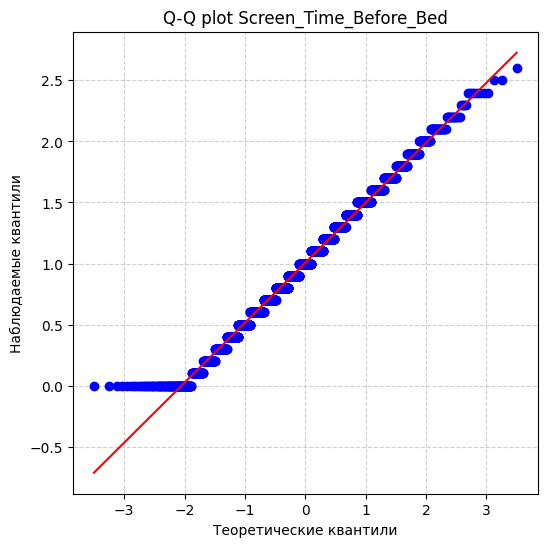

In [28]:
from scipy import stats

def qq_plot(data, col_name=""):
    plt.figure(figsize=(6,6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q plot {col_name}")
    plt.xlabel("Теоретические квантили")
    plt.ylabel("Наблюдаемые квантили")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


qq_plot(data, col)


## Задание III. 

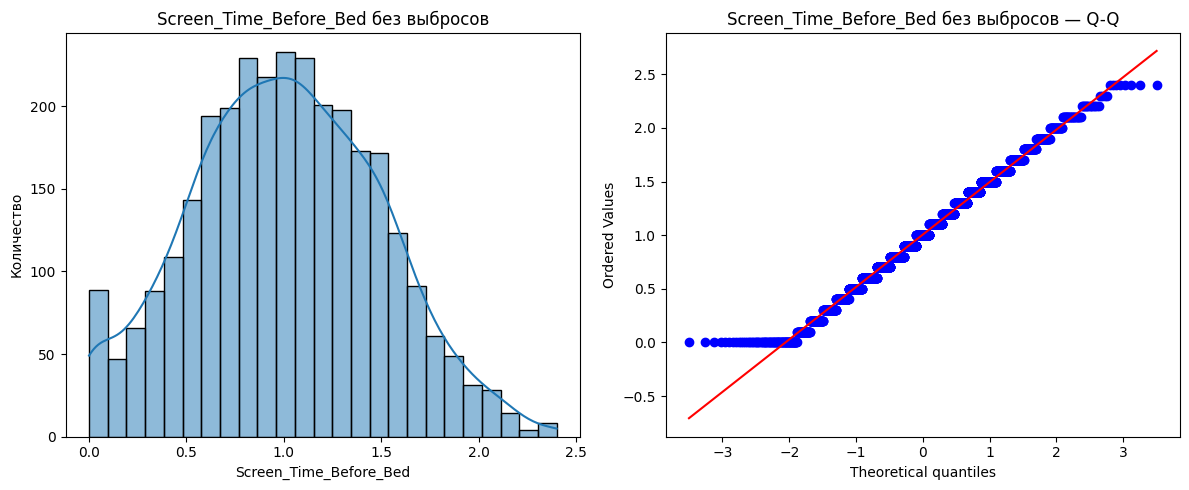


=== Проверка после удаления выбросов ===

Критерий хи-квадрат для Screen_Time_Before_Bed:
Хи² статистика = 64.2701, критическое значение = 16.9190, α = 0.05
Гипотеза H0 отвергается

=== Проверка нормальности (асимметрия и эксцесс) ===
Размер выборки n = 2997
Асимметрия: 0.079 | z = 1.764
Эксцесс:    -0.393 | z = -4.396
Критическое значение для α=0.05: ±1.960
Асимметрия в пределах нормы
Эксцесс выходит за пределы нормы

Гипотеза H0 о нормальности отвергается


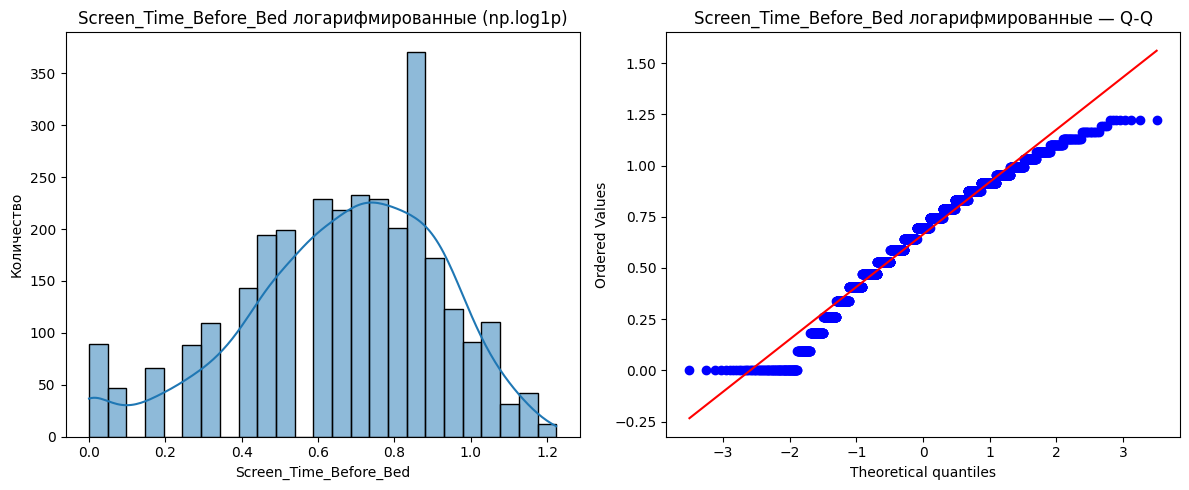


=== Проверка после логарифмирования ===

Критерий хи-квадрат для Screen_Time_Before_Bed:
Хи² статистика = 581.3723, критическое значение = 16.9190, α = 0.05
Гипотеза H0 отвергается

=== Проверка нормальности (асимметрия и эксцесс) ===
Размер выборки n = 2997
Асимметрия: -0.542 | z = -12.123
Эксцесс:    -0.041 | z = -0.456
Критическое значение для α=0.05: ±1.960
Асимметрия выходит за пределы нормы
Эксцесс в пределах нормы

Гипотеза H0 о нормальности отвергается


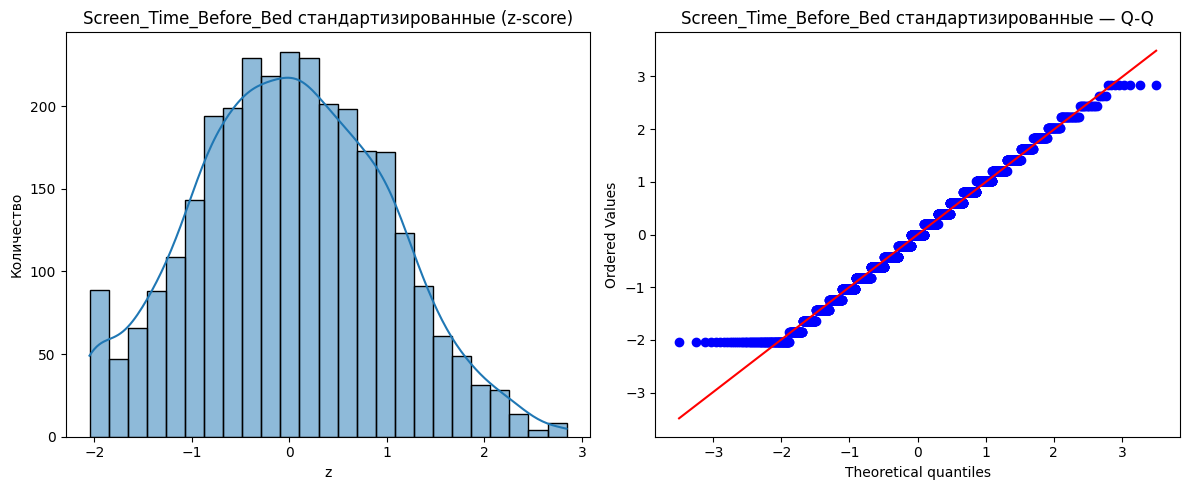


=== Проверка после стандартизации ===

Критерий хи-квадрат для Screen_Time_Before_Bed:
Хи² статистика = 177.3185, критическое значение = 16.9190, α = 0.05
Гипотеза H0 отвергается

=== Проверка нормальности (асимметрия и эксцесс) ===
Размер выборки n = 2997
Асимметрия: 0.079 | z = 1.764
Эксцесс:    -0.393 | z = -4.396
Критическое значение для α=0.05: ±1.960
Асимметрия в пределах нормы
Эксцесс выходит за пределы нормы

Гипотеза H0 о нормальности отвергается


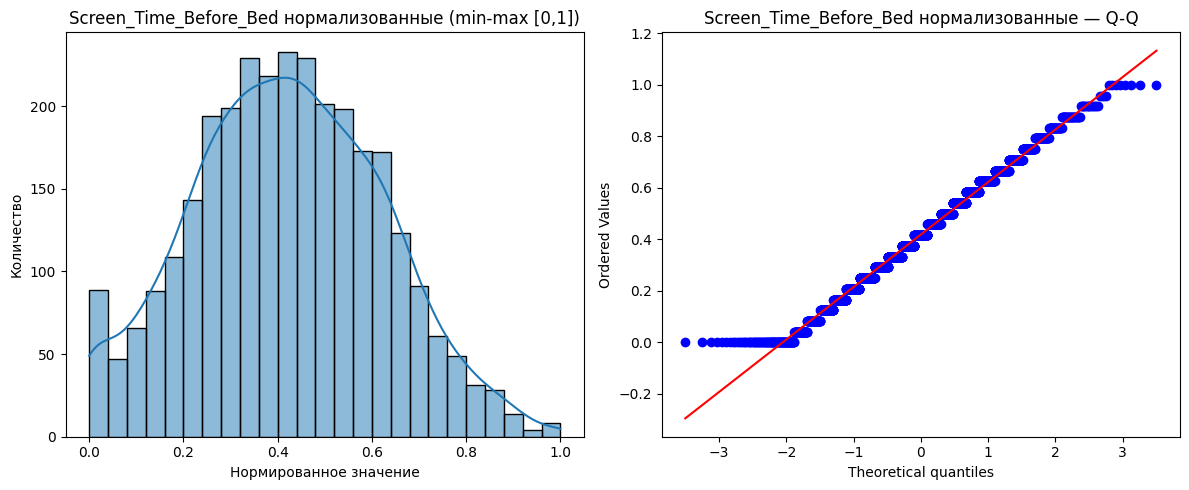


=== Проверка после нормализации ===

Критерий хи-квадрат для Screen_Time_Before_Bed:
Хи² статистика = 64.2701, критическое значение = 16.9190, α = 0.05
Гипотеза H0 отвергается

=== Проверка нормальности (асимметрия и эксцесс) ===
Размер выборки n = 2997
Асимметрия: 0.079 | z = 1.764
Эксцесс:    -0.393 | z = -4.396
Критическое значение для α=0.05: ±1.960
Асимметрия в пределах нормы
Эксцесс выходит за пределы нормы

Гипотеза H0 о нормальности отвергается


In [34]:
Q1, Q3 = data.quantile([0.25, 0.75])
IQR = Q3 - Q1
filtered = data[(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)]

log_transformed = np.log1p(filtered)

standardized = (filtered - filtered.mean()) / filtered.std(ddof=1)

den = filtered.max() - filtered.min()
if den == 0:
    normalized = filtered * 0.0
else:
    normalized = (filtered - filtered.min()) / den

plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
sns.histplot(filtered, bins=25, kde=True, stat="count", edgecolor="black")
ax1.set_title(f"{col} без выбросов")
ax1.set_xlabel(col); ax1.set_ylabel("Количество")

ax2 = plt.subplot(1,2,2)
stats.probplot(filtered, dist="norm", plot=ax2)
ax2.set_title(f"{col} без выбросов — Q-Q")

plt.tight_layout()
plt.show()

print("\n=== Проверка после удаления выбросов ===")
chi_square_test(filtered)
skewness_kurtosis_test_v2(filtered)


plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
sns.histplot(log_transformed, bins=25, kde=True, stat="count", edgecolor="black")
ax1.set_title(f"{col} логарифмированные (np.log1p)")
ax1.set_xlabel(col); ax1.set_ylabel("Количество")

ax2 = plt.subplot(1,2,2)
stats.probplot(log_transformed, dist="norm", plot=ax2)
ax2.set_title(f"{col} логарифмированные — Q-Q")

plt.tight_layout()
plt.show()

print("\n=== Проверка после логарифмирования ===")
chi_square_test(log_transformed)
skewness_kurtosis_test_v2(log_transformed)

plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
sns.histplot(standardized, bins=25, kde=True, stat="count", edgecolor="black")
ax1.set_title(f"{col} стандартизированные (z-score)")
ax1.set_xlabel("z"); ax1.set_ylabel("Количество")

ax2 = plt.subplot(1,2,2)
stats.probplot(standardized, dist="norm", plot=ax2)
ax2.set_title(f"{col} стандартизированные — Q-Q")

plt.tight_layout()
plt.show()

print("\n=== Проверка после стандартизации ===")
chi_square_test(standardized)
skewness_kurtosis_test_v2(standardized)

plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
sns.histplot(normalized, bins=25, kde=True, stat="count", edgecolor="black")
ax1.set_title(f"{col} нормализованные (min-max [0,1])")
ax1.set_xlabel("Нормированное значение"); ax1.set_ylabel("Количество")

ax2 = plt.subplot(1,2,2)
stats.probplot(normalized, dist="norm", plot=ax2)
ax2.set_title(f"{col} нормализованные — Q-Q")

plt.tight_layout()
plt.show()

print("\n=== Проверка после нормализации ===")
chi_square_test(normalized)
skewness_kurtosis_test_v2(normalized)


## Задание IV.

                  mean       var
School_Grade                    
10th          1.020945  0.240960
11th          1.022547  0.233507
12th          0.982420  0.243762
7th           1.006640  0.254694
8th           1.005187  0.241366
9th           1.005133  0.244107


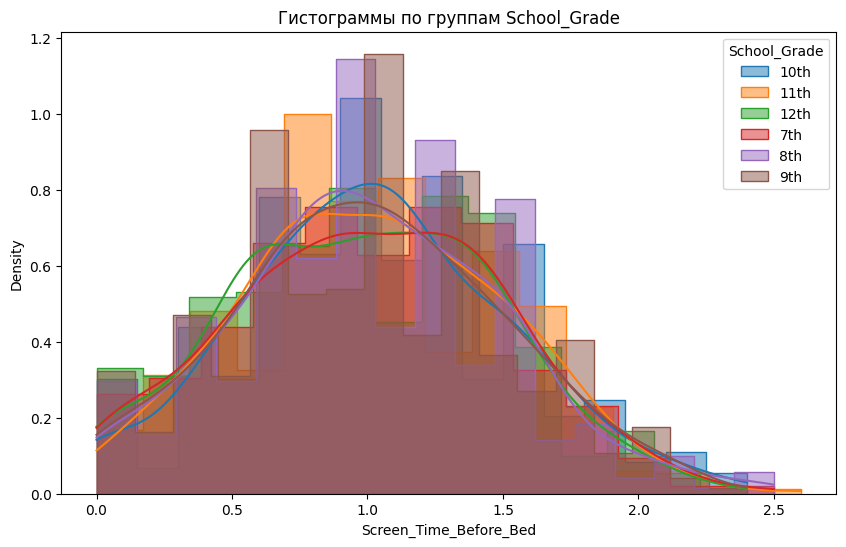

In [16]:
groups = df.groupby('School_Grade')[col]
groups_stats = groups.agg(['mean','var'])
print(groups_stats)

plt.figure(figsize=(10,6))
for grade, subset in groups:
    sns.histplot(subset, label=str(grade), kde=True, stat="density", element="step")
plt.legend(title="School_Grade")
plt.title("Гистограммы по группам School_Grade")
plt.show()

## Общая выборка исходит из схожих распределений, и статистики (средняя и дисперсия) статистически сильно не различаются.